In [16]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [47]:
import os
for dirname, _, filenames in os.walk('E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (1).jpeg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (1).jpg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (1).png
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (10).jpeg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (10).jpg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (10).png
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (100).jpeg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (100).jpg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (101).jpeg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (101).jpg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (102).jpeg
E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset\Bike\Bike (102).jpg
E:\KULIAH\Semester 6\DEEP LEARNI

In [48]:
data_path='E:\KULIAH\Semester 6\DEEP LEARNING\Research\Car-Bike-Dataset'

class_name=sorted(os.listdir(data_path))
class_name

['Bike', 'Car']

In [75]:
class_dis = [len(os.listdir(os.path.join(data_path, name))) for name in class_name]
class_dis

[250, 250]

In [76]:
n_classes = len(class_name)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [85]:
fig = px.pie(names=class_name, values=class_dis)
fig.update_layout({'title':{
    'text':'Class Distribution',
    'x':0.5
}})
fig.show()

In [82]:
data_test='E:\KULIAH\Semester 6\DEEP LEARNING\Research\Testing'

class_test=sorted(os.listdir(data_test))
class_test

['Bike', 'Car']

In [83]:
class_dis = [len(os.listdir(os.path.join(data_test, name))) for name in class_test]
class_dis

[20, 20]

In [84]:
n_classes = len(class_test)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# generators
# Initialize Generator
gen = ImageDataGenerator(
    rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest"
)

train_ds=gen.flow_from_directory(
    data_path,
    target_size= (224, 224), 
    class_mode="sparse"
)

validation_ds=gen.flow_from_directory(
    data_test,
    target_size= (224, 224), 
    class_mode="sparse"
)

Found 500 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [92]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

c:\ProgramData\miniconda3\lib\site-packages\PIL\Image.py:996: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



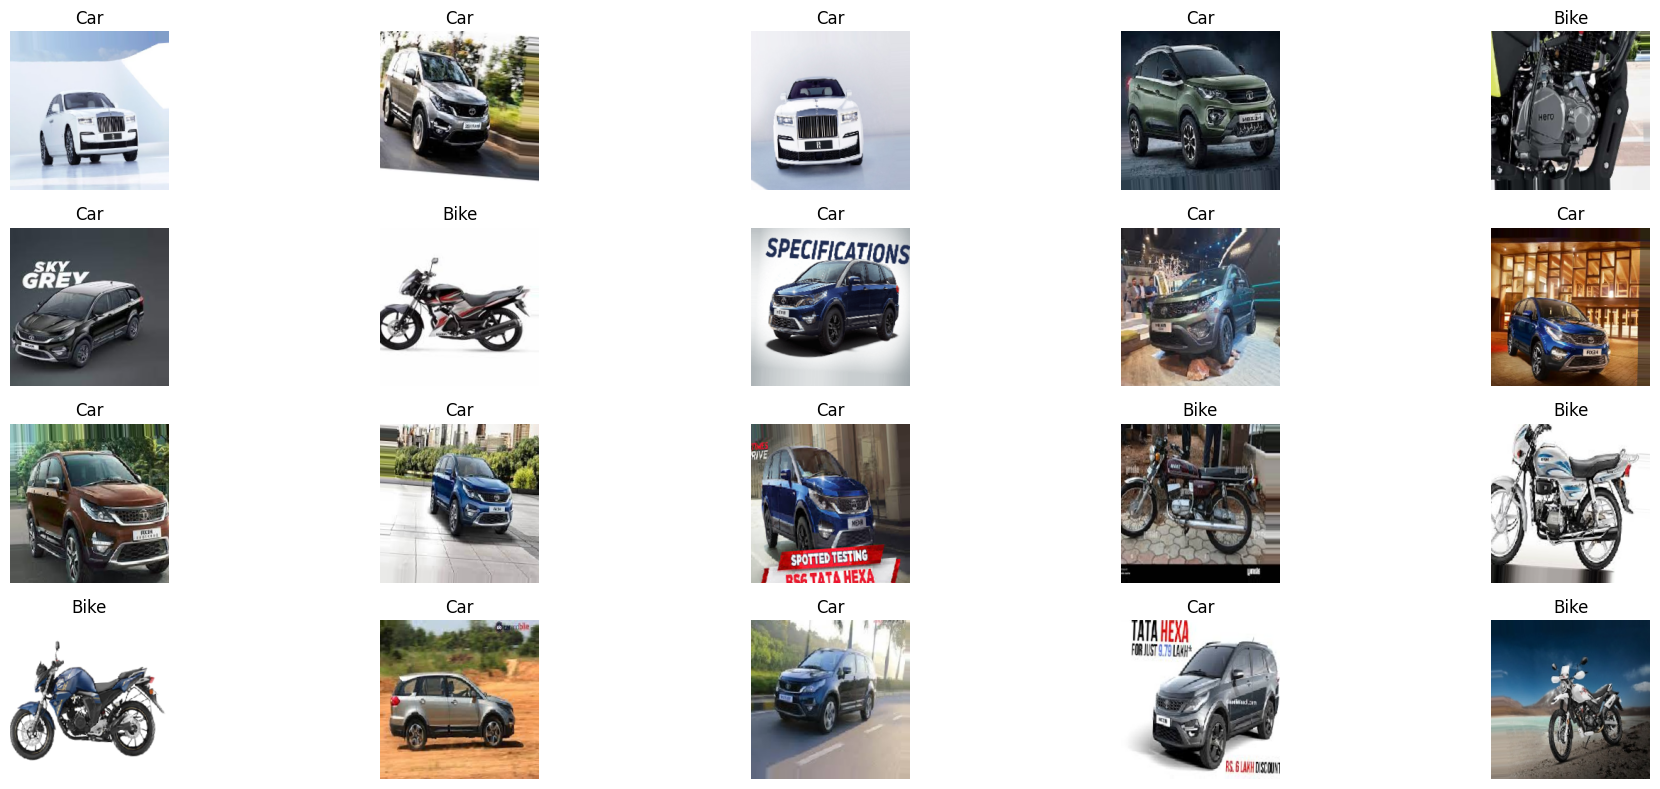

In [93]:
i=1
plt.figure(figsize=(20,8))
for images, labels in train_ds:
    index = np.random.randint(len(images))
    image, label = images[index], labels[index]

    plt.subplot(4,5, i)
    show_image(image, title=f"{class_name[int(label)]}")
    i+=1
    if i>=21: break

plt.tight_layout()
plt.show()


In [99]:
# Create CNN Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Flatten())    

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_20 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_21 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                      

In [101]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [102]:
history=model.fit(train_ds,epochs=16,validation_data=validation_ds, batch_size= 32, shuffle= True)

Epoch 1/16
16/16 [==============================] - 74s 4s/step - loss: 1.5759 - accuracy: 0.6920 - val_loss: 1.0593 - val_accuracy: 0.5000
Epoch 2/16
16/16 [==============================] - 76s 5s/step - loss: 1.3419 - accuracy: 0.7240 - val_loss: 2.0276 - val_accuracy: 0.5000
Epoch 3/16
16/16 [==============================] - 72s 5s/step - loss: 0.6141 - accuracy: 0.8140 - val_loss: 3.7885 - val_accuracy: 0.5000
Epoch 4/16
16/16 [==============================] - 67s 4s/step - loss: 0.6305 - accuracy: 0.8500 - val_loss: 1.8691 - val_accuracy: 0.5000
Epoch 5/16
16/16 [==============================] - 91s 6s/step - loss: 0.5880 - accuracy: 0.8640 - val_loss: 4.0599 - val_accuracy: 0.5000
Epoch 6/16
16/16 [==============================] - 88s 5s/step - loss: 0.5597 - accuracy: 0.8540 - val_loss: 3.3763 - val_accuracy: 0.5000
Epoch 7/16
16/16 [==============================] - 91s 6s/step - loss: 0.3959 - accuracy: 0.8740 - val_loss: 2.4573 - val_accuracy: 0.5000
Epoch 8/16
16/16 [==

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 10

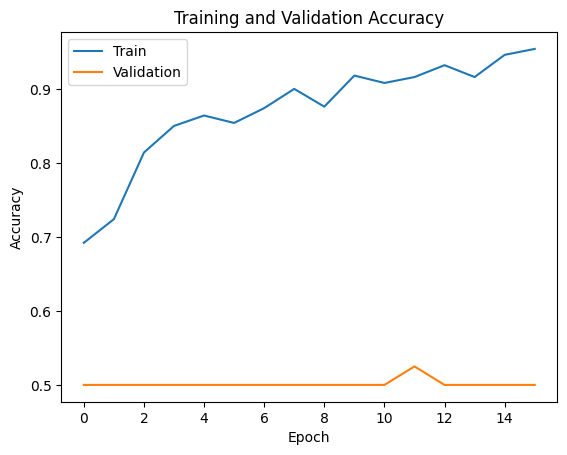

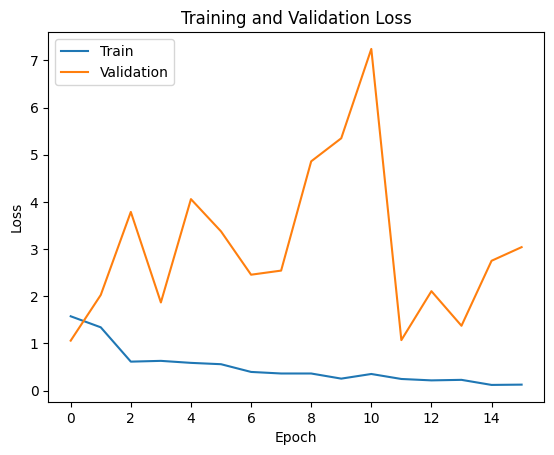

In [115]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [116]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 117ms/step


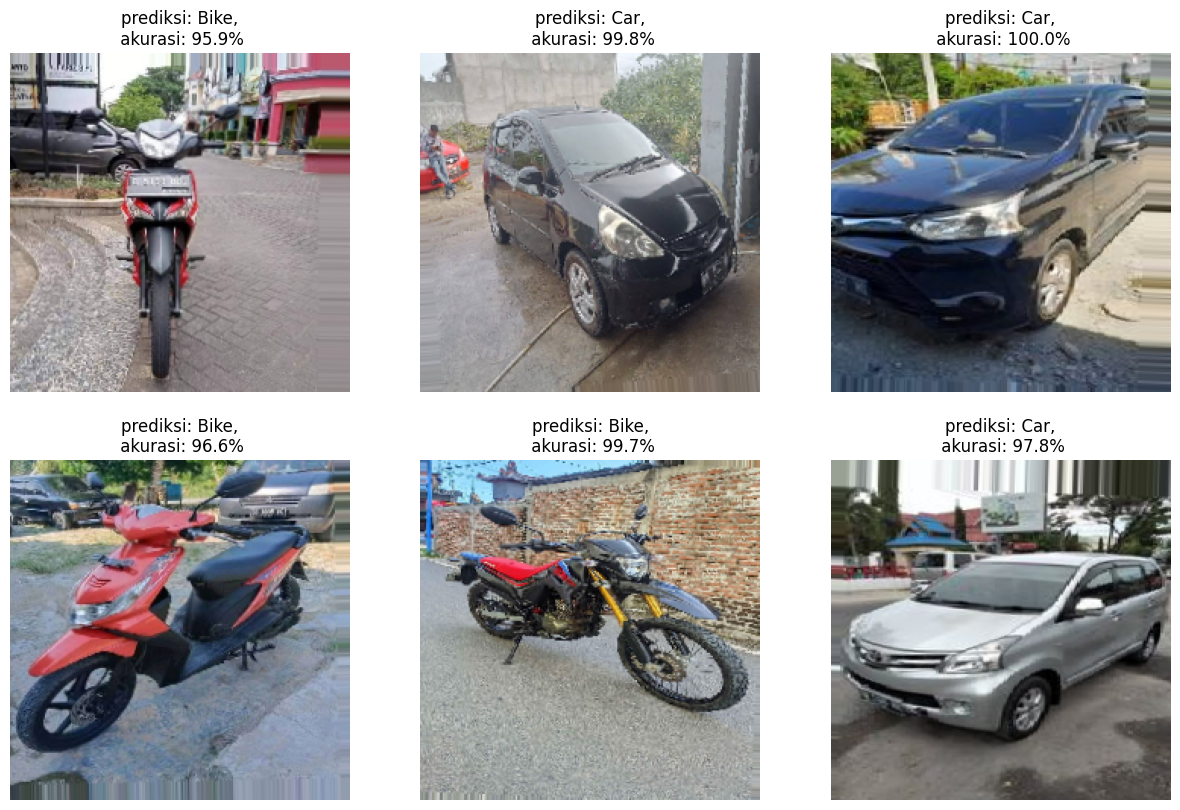

In [158]:
plt.figure(figsize=(15, 15))

for images, labels in validation_ds:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"prediksi: {actual_class},\n akurasi: {confidence}%")
        plt.axis("off")
    break